<a href="https://colab.research.google.com/github/Sindhu291/water-quality-prediction/blob/main/Water_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# @title Default title text
df = pd.read_csv('/content/PB_All_2000_2021.csv', sep=';')  # Replace with your dataset file name

df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [ ]:
print(df.columns)
print(df.isnull().sum())
df.describe()


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [ ]:
df = df.dropna()

# Define Features and Targets
# 🟩 INPUT columns (Example - change based on your dataset)
# Based on the dataset preview, the following columns are available:
# id, date, NH4, BSK5, Suspended, O2, NO3, NO2, SO4, PO4, CL
# Assuming 'id' and 'date' are not features, and the others are potential targets or features.
# You might want to select specific columns as features based on domain knowledge.
# As a starting point, I'll use 'Suspended' as a potential feature. You should adjust this based on your understanding of the data.
X = df[['Suspended']]  # Replace with actual sensor inputs

# 🟥 OUTPUT columns (pollutants to predict)
y = df[['NH4', 'NO3', 'NO2', 'O2', 'BSK5', 'PO4', 'CL', 'SO4']]  # Target pollutants

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model = MultiOutputRegressor(rf)

# Train the Model
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: -0.20949436410530717
MSE: 19252.61350945674


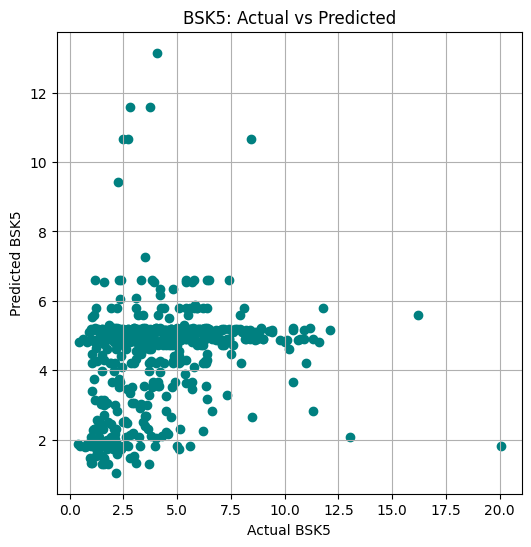

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test['BSK5'], y_pred[:, y.columns.get_loc('BSK5')], color='teal')
plt.xlabel("Actual BSK5")
plt.ylabel("Predicted BSK5")
plt.title("BSK5: Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test['BSK5'], y_pred[:, y.columns.get_loc('BSK5')], color='teal')
plt.xlabel("Actual BSK5")
plt.ylabel("Predicted BSK5")
plt.title("BSK5: Actual vs Predicted")
plt.grid(True)
plt.show()


NH4 → R²: -0.186, MSE: 4.763
NO3 → R²: -0.151, MSE: 45.586
NO2 → R²: -0.555, MSE: 0.272
O2 → R²: -0.172, MSE: 17.290
BSK5 → R²: -0.023, MSE: 6.715
PO4 → R²: -0.303, MSE: 0.563
CL → R²: -0.130, MSE: 149181.308
SO4 → R²: -0.155, MSE: 4764.412


In [ ]:
import joblib
joblib.dump(model, 'water_quality_model.pkl')

['water_quality_model.pkl']